<a href="https://colab.research.google.com/github/MelKanyi/House_Pricing_Prediction_Project/blob/master/Moringa_Data_Science_Core_W7_Independent_Project_2020_Melissa_Kanyi_Python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hass Consulting Company Project**

# 1. Defining the Question

## a) Specifying the Question

> You just got some contract with a real estate company, i.e; Hass Consulting Company,to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. They've hired you on contract to help them figure it out!

## b) Defining the Metric for Success

## c) Understanding the context 

## d) Recording the Experimental Design

## e) Data Relevance

The link to the dataset is:

* http://bit.ly/IndependentProjectWeek7Dataset

# Importing necessary Libraries


In [0]:
# Lets load all the necessary libraries for our workflow.
#
# Analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import pandas_profiling as pp

# Machine learning libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,  r2_score 
from scipy import stats
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings('ignore')

# Other libraries
import datetime as dt

# 2. Reading the Data

In [0]:
# Loading the Dataset
# 
house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

# 3. Checking the Data

In [263]:
# Previewing our dataset
house

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [264]:
# Previewing the top of our dataset
#
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [265]:
# Previewing the bottom of our dataset
# 
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [266]:
# Checking whether each column has an appropriate datatype
#
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


Machine learning models do not take in categorical variables and from the output above we see that we do not have any categorical variables hence there will not be any need to convert to numeric.



# 5. Tidying the Dataset

In [267]:
# check for duplicates
duplicated = house[house.duplicated()]
duplicated.shape

(3, 20)

In [0]:
# deleting the duplicated values
house = house.drop_duplicates()

In [269]:
# Identifying the Missing Data
#
house.isnull().any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

> From the code above, we can see that there are no missing values in our dataframe

In [0]:
# checking for Outliers
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(columns), figsize=(10,80))
    
    for i, column_name in enumerate(columns):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    
    plt.show()

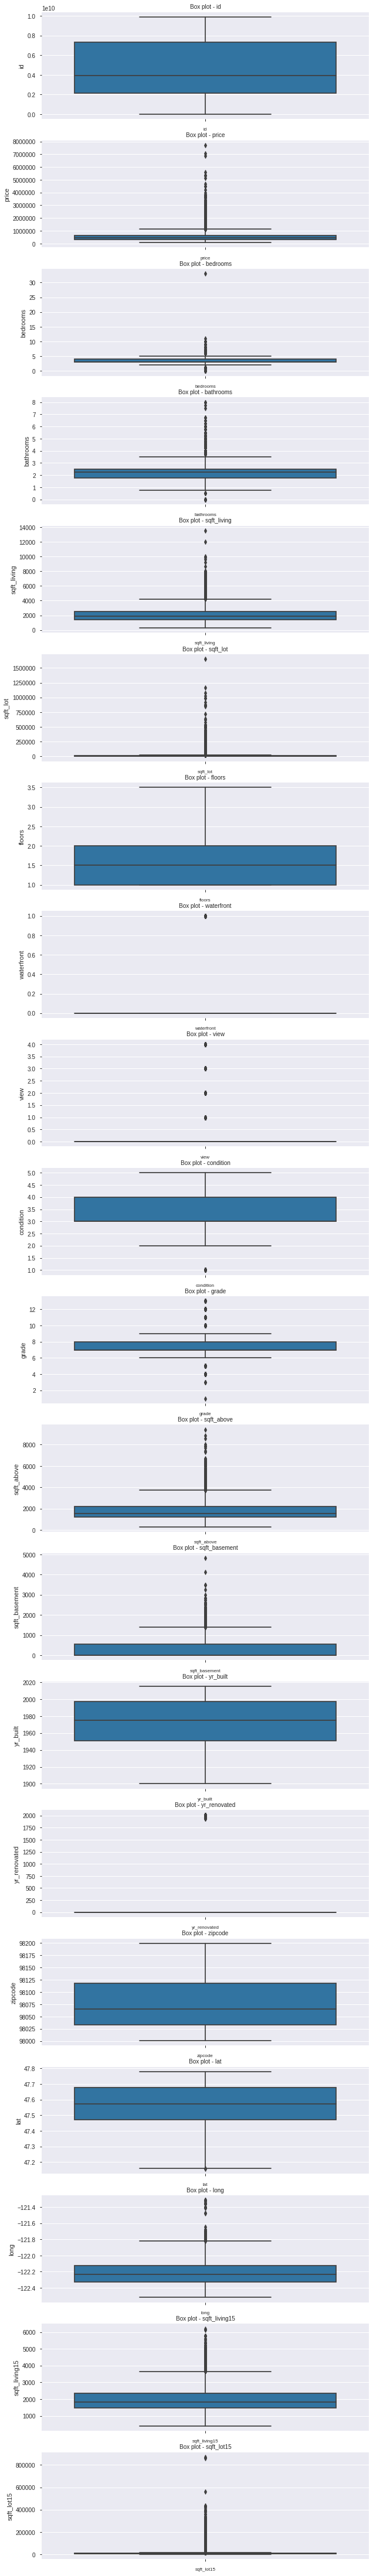

In [271]:
# Execute the function
columns = house.columns
target_dataframe = house

plot_boxplots(target_dataframe,columns)

# 6. Exploratory Analysis

We will use Pandas Profiling to get an overview of both our dataframes

and their statistical summaries

In [272]:
# Getting an overview of the house dataframe
pp.ProfileReport(house)

Number of variables,21
Number of observations,21610
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,20
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


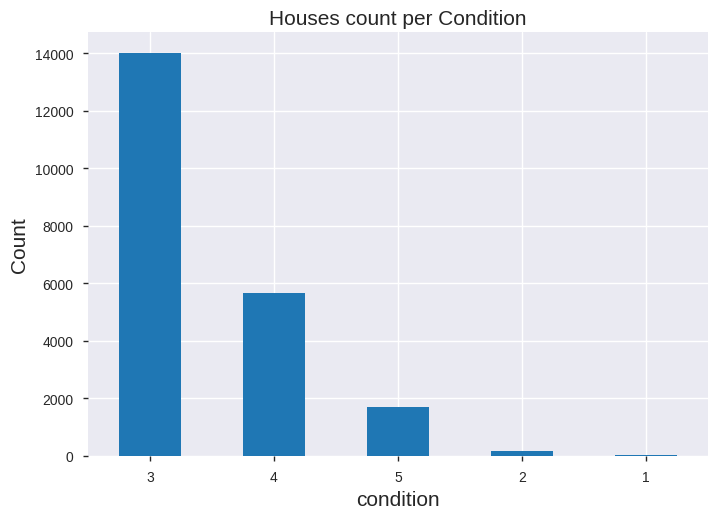

In [273]:
# visualization showing the house count per condition
house['condition'].value_counts().plot.bar(rot =0)
plt.xlabel("condition",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses count per Condition",fontsize=15)
plt.show()

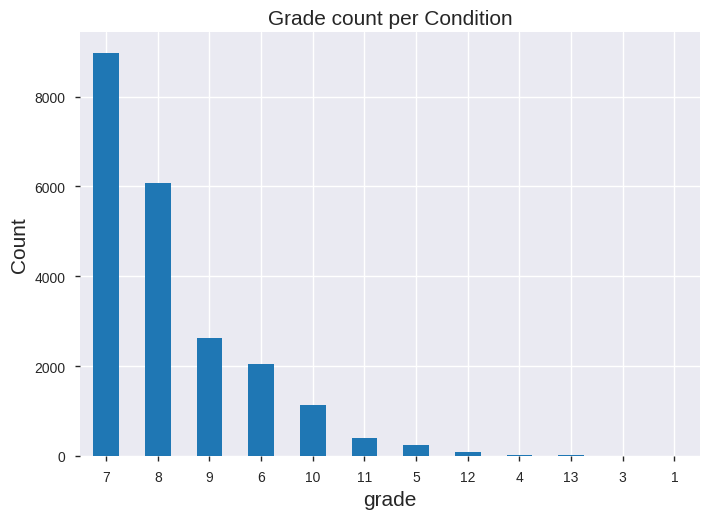

In [274]:
# visualization showing the grade count per condition
house['grade'].value_counts().plot.bar(rot =0)
plt.xlabel("grade",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Grade count per Condition",fontsize=15)
plt.show()

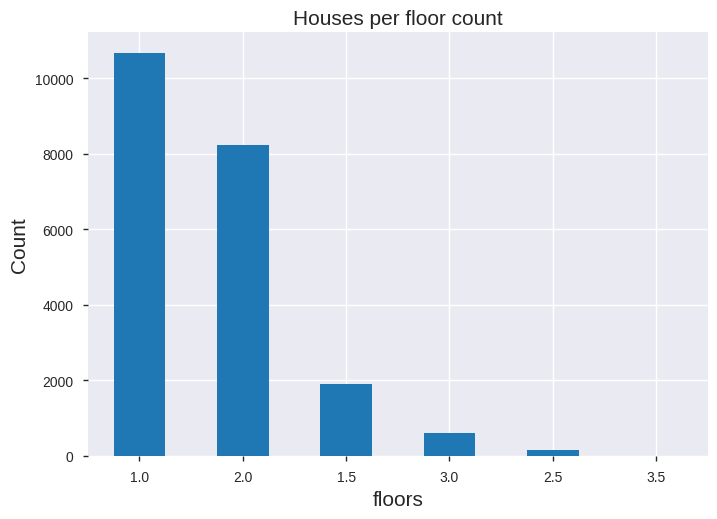

In [275]:
# visualization showing the house count per floor
house['floors'].value_counts().plot.bar(rot =0)
plt.xlabel("floors", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per floor count",fontsize=15)
plt.show()

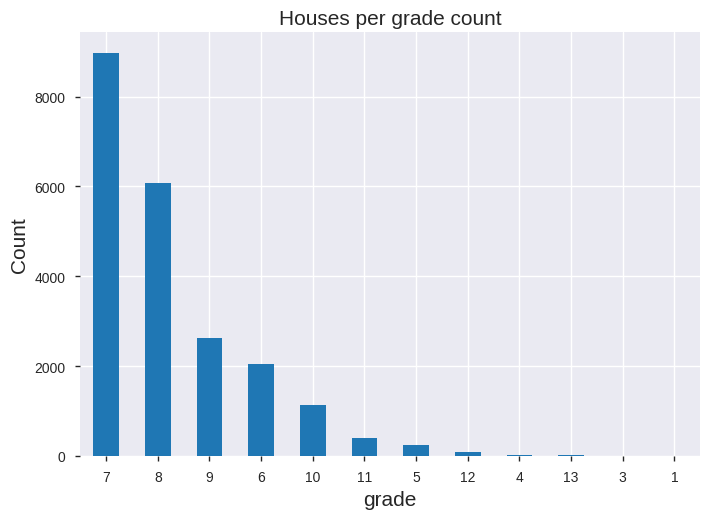

In [276]:
# visualization showing the house count per grade
house['grade'].value_counts().plot.bar(rot =0)
plt.xlabel("grade", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per grade count",fontsize=15)
plt.show()

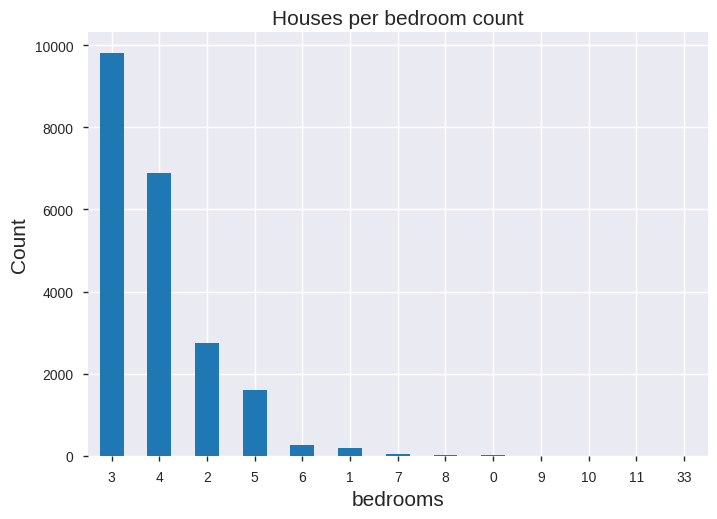

In [277]:
# visualization showing the house count per bedroom
house['bedrooms'].value_counts().plot.bar(rot =0)
plt.xlabel("bedrooms", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per bedroom count",fontsize=15)
plt.show()

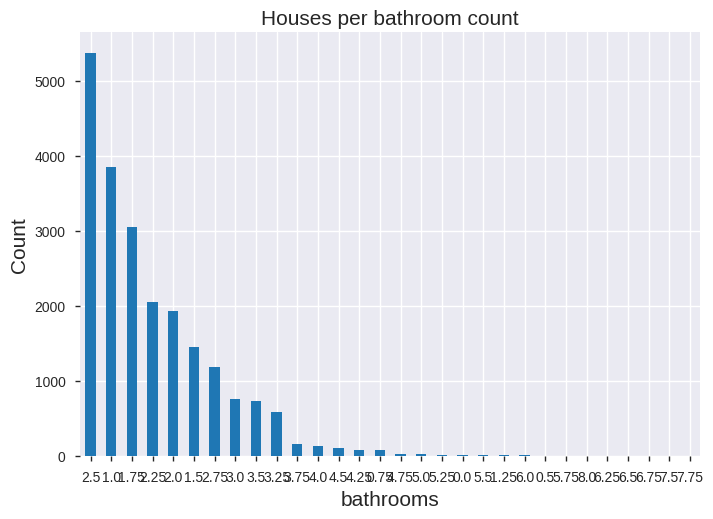

In [278]:
# visualization showing the house count per bathroom
house['bathrooms'].value_counts().plot.bar(rot =0)
plt.xlabel("bathrooms", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per bathroom count",fontsize=15)
plt.show()

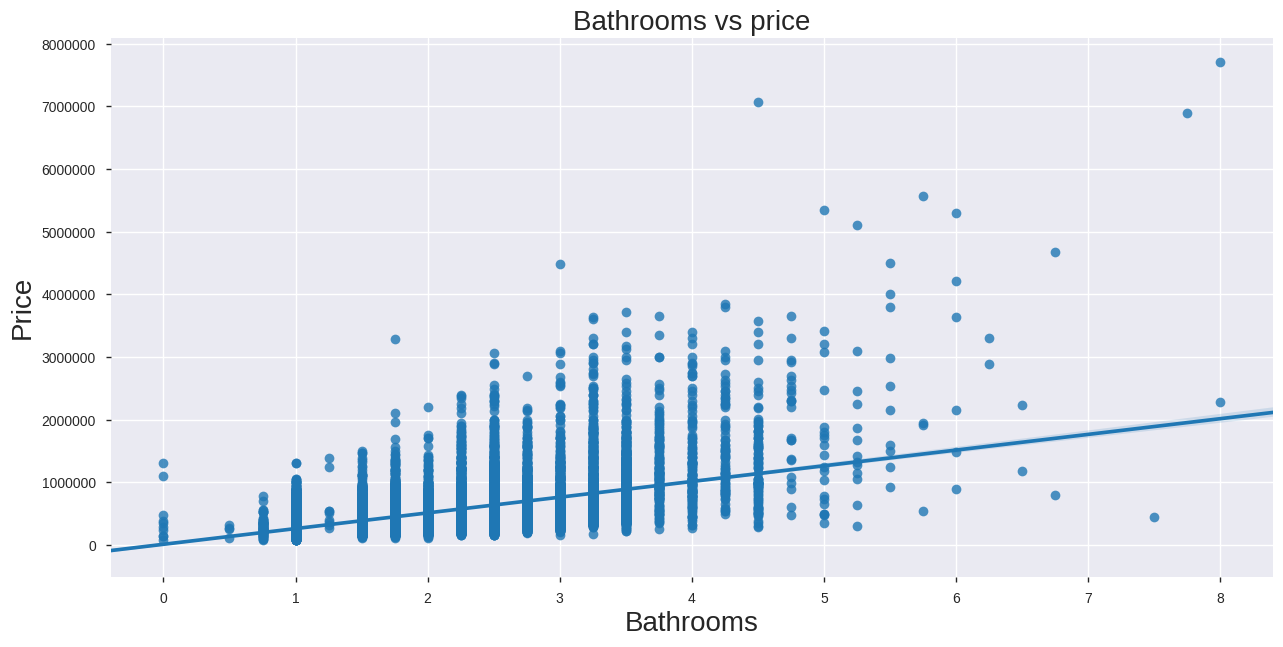

In [279]:
# Scatter plot to check for any correlation between bathrooms and Price
plt.figure(figsize = (15,7))
sns.regplot(house['bathrooms'], house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bathrooms',fontsize = 20)
plt.title('Bathrooms vs price',fontsize = 20)
plt.show()

The number of bathrooms has a positive correlation with price of the house.

# Multicollinearity
 * Checking for multicollinearity 
 * Dealing with multicollinearity

In [280]:
# Before we build a model we shall check if
# the independent variables are collinear/ correlated to each other

# Getting the pearson correation coefficient for each of the variables

corr = house.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016803,0.001354,0.005093,-0.012239,-0.132101,0.018482,-0.002717,0.011785,-0.023686,0.008093,-0.010857,-0.005084,0.021218,-0.016688,-0.008129,-0.001861,0.020776,-0.002869,-0.138778
price,-0.016803,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.001354,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.005093,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,-0.012239,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,-0.132101,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.018482,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,-0.002717,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.011785,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,-0.023686,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424


he correlation matrix indicates that most variables are moderately or weakly correlated.

This is very beneficial when creating a model, as collinear variables reduce the power of the model to identify independent variables that are statistically significant.

We aim to create a model with the most significant variables.

We will use the correlation matrix to calculate the vif (Variance Inflation Factor).

The VIF will help in determining the variables that are collinear or highly correlated with each other.

In [281]:
# checking for multicollinearity using the variance Inflation Factor (VIF)
# which is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# From the correlation matrix below there are no correlated independent variables
# as all have VIF below 5, which is the threshold

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028540,0.033969,0.002152,-0.005156,-1.078547e-02,0.077239,-0.011689,0.002847,-0.038108,0.021970,-0.048362,2.822075e-02,-1.367562e-03,0.023671,0.017587,0.000245,0.007392,-0.072991,0.009146,0.105496
price,0.033969,3.332295,0.301726,-0.287101,-7.824212e-01,-0.045576,-0.033555,-0.456966,-0.369703,-0.155362,-1.024667,-6.545554e-01,-2.236306e-01,0.699144,-0.072360,0.282693,-0.757299,0.271815,-0.134514,0.098148
bedrooms,0.002152,0.301726,1.679480,-0.487420,-6.863650e-01,0.045131,0.046820,0.021695,0.080986,-0.064722,0.214196,-3.785689e-01,-2.075553e-01,0.197799,0.039231,0.105773,-0.017745,0.042233,0.013095,0.094209
bathrooms,-0.005156,-0.287101,-0.487420,3.375989,-3.080639e+00,-0.020275,-0.672494,0.049452,-0.010460,-0.123931,-0.179562,1.618729e+00,4.571242e-01,-0.996017,-0.254241,0.017438,0.024134,0.030487,0.103587,0.062761
sqft_living,-0.010671,-0.785636,-0.684739,-3.079309,1.814600e+13,-0.073058,2.733193,0.032254,0.077197,-0.137856,-1.706775,-1.636081e+13,-8.743992e+12,0.302271,0.174530,-0.417095,0.123040,0.160806,-1.028101,-0.073623
sqft_lot,0.077239,-0.045576,0.045131,-0.020275,-7.361365e-02,2.109022,0.044783,0.034186,-0.056648,0.034427,-0.042716,-1.117718e-01,1.157131e-03,0.090422,0.023669,-0.006645,0.064838,-0.142649,0.166567,-1.452753
floors,-0.011689,-0.033555,0.046820,-0.672494,2.732644e+00,0.044783,2.012437,-0.001005,-0.035965,0.091136,-0.220090,-2.954203e+00,-6.953608e-01,-0.488547,-0.079459,-0.173633,-0.120062,0.162380,0.273871,0.070515
waterfront,0.002847,-0.456966,0.021695,0.049452,3.222799e-02,0.034186,-0.001005,1.266689,-0.442407,0.008657,0.189510,4.588843e-02,6.347172e-02,-0.116857,-0.055794,-0.016224,0.113775,-0.010586,0.072920,-0.031177
view,-0.038108,-0.369703,0.080986,-0.010460,7.681818e-02,-0.056648,-0.035965,-0.442407,1.477484,-0.004676,-0.070322,1.196197e-01,-2.265400e-01,0.073566,-0.031703,-0.171914,0.202148,0.044307,-0.310816,-0.021847
condition,0.021970,-0.155362,-0.064722,-0.123931,-1.381436e-01,0.034427,0.091136,0.008657,-0.004676,1.257283,-0.007603,2.443369e-01,-2.866157e-03,0.529293,0.210707,0.148039,0.099381,-0.021284,0.082421,-0.030425


We check VIFs along the diagonal.

VIFs values that are greater than 5 indicate the presence of multicollinearity.

If present, we remove the variable with the greatest VIF value.

From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold.

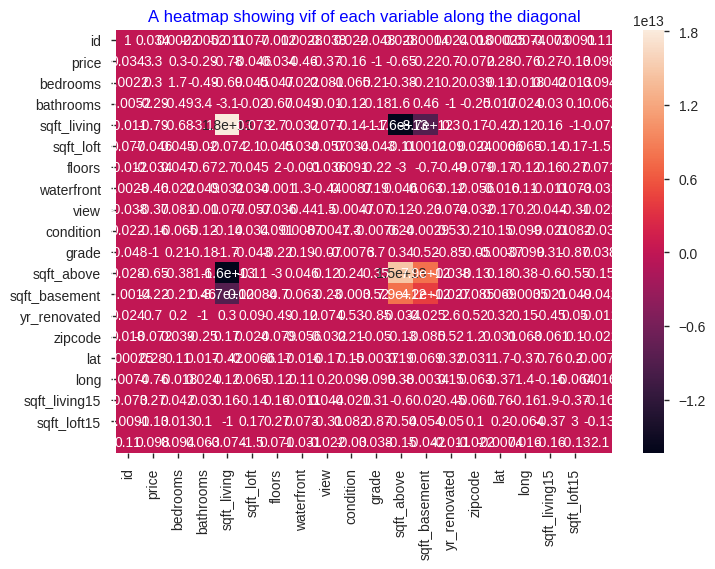

In [282]:
# Plotting a heat map to show the VIF visually.

vif = np.linalg.inv(corr.values)
sns.heatmap(vif, annot = True, xticklabels=['id' ,'price' ,'bedrooms', 'bathrooms' , 'sqft_living','sqft_loft','floors','waterfront','view','condition' ,'grade','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_loft15'], yticklabels=['id' ,'price' ,'bedrooms', 'bathrooms' , 'sqft_living','sqft_loft','floors','waterfront','view','condition' ,'grade','sqft_above','sqft_basement','yr_renovated','zipcode','lat','long','sqft_living15','sqft_loft15'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'blue' )
plt.show()

# **Building a model**

## Creating Train and Test Sets

In [0]:
# Creating x and y variables
x = house.drop(['price'],1)
y = house['price']

In [284]:
# Since we are not working with only one independent variable, we need to 
# Drop highly correlated variables
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calculate_vif(X, thresh):
  cols = X.columns
  variables = np.arange(X.shape[1])
  dropped=True
  while dropped:
      dropped=False
      c = X[cols[variables]].values
      vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
      maxloc = vif.index(max(vif))
      if max(vif) > thresh:
          print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
          variables = np.delete(variables, maxloc)
          dropped=True
  print('Remaining variables:')
  print(X.columns[variables])
  return X[cols[variables]]


calculate_vif(x,100)

dropping 'sqft_living' at index: 3
Remaining variables:
Index(['id', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [0]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.2)

## Multiple Linear Regression

In [286]:
# Fit Linear Regression model to the dataset
# This is for comparing the linear regression model to the other regression models)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
# display the intercept / bias
print(regressor.intercept_)

# display the coefficient
print(regressor.coef_)

5409708.377417079
[-1.45768563e-06 -3.30624530e+04  4.02666982e+04  1.04505620e+02
  1.31018550e-01  8.13261018e+03  5.17124706e+05  5.37314265e+04
  2.64508421e+04  9.97354363e+04  6.71279561e+01  3.73776643e+01
 -2.62220027e+03  1.67091394e+01 -5.53174272e+02  5.97860508e+05
 -2.03583997e+05  2.09511719e+01 -4.24747076e-01]


How good is our newly fitted model? Let's feed it the data we saved for testing. We will have the model predict house prices based on those variables we set aside, then compare that to the actual chances from the original dataset.

In [288]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'actual': y_test, 'predicted': y_predict})
comparison_frame.head(20)

,actual,predicted
13220,240000.0,342368.192961
16115,616950.0,665640.829169
4634,865000.0,605944.284104
6065,525000.0,700982.904061
4425,285000.0,294810.169934
17399,199000.0,243721.090683
275,365000.0,537909.087536
1236,270000.0,155301.698038
17763,530000.0,695232.735025
18397,306000.0,265906.354000


### Heteroskedasity testing

-Heteroscedasticity is the condition in which the variance of error term or the residual term in a regression model varies.

-One of the assumptions of the linear regression states that the error term should have a constant variance; homoscedasticity.

-If this is violated, then we have heteroscedasticity.

 - Possible Reasons for heteroscedasticity

1. Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.

2. When model is not correctly specified.

3. If observations are mixed with different measures of scale.

4. When incorrect transformation of data is used to perform the regression.

5. Skewness in the distribution of a regressor, and may be some other sources.

**Effects of heteroscedasticity**

-As mentioned above that one of the assumptions of linear regression is that there is no heteroscedasticity. Breaking this assumption means that OLS (Ordinary Least Square) estimators are not the Best Linear Unbiased Estimator(BLUE) and their variance is not the lowest of all other unbiased estimators.

-Estimators are no longer best/efficient.

-The tests of hypothesis (like t-test, F-test) are no longer valid due to the inconsistency in the co-variance matrix of the estimated regression coefficients.

In [289]:
# Using our model to make a prediction

y_predict = regressor.predict(X_test)

# We now create the residual by subtracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Creating a summary description of the residuals:

pd.DataFrame(residuals).describe()

residuals.mean()

-2864.686271607848

### Residual Plots

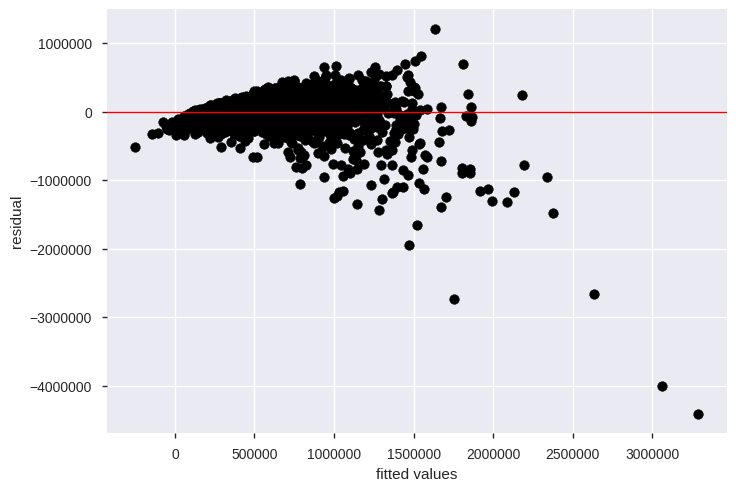

In [290]:
# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### Barlett's Test

In [291]:
# Carrying out Barlett's test 
# It is a more thorough heteroskedasticity test.

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value


critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are Homogeneous!')

2.7488979964973604e-173
The variances are Homogeneous!


In [292]:
# display the intercept / bias
print(regressor.intercept_)

# display the coefficient
print(regressor.coef_)

5409708.377417079
[-1.45768563e-06 -3.30624530e+04  4.02666982e+04  1.04505620e+02
  1.31018550e-01  8.13261018e+03  5.17124706e+05  5.37314265e+04
  2.64508421e+04  9.97354363e+04  6.71279561e+01  3.73776643e+01
 -2.62220027e+03  1.67091394e+01 -5.53174272e+02  5.97860508e+05
 -2.03583997e+05  2.09511719e+01 -4.24747076e-01]


In [293]:
print("regressor.coef_: {}".format(regressor.coef_))

print('*'*50)
print("regressor.intercept_: {}".format(regressor.intercept_))

regressor.coef_: [-1.45768563e-06 -3.30624530e+04  4.02666982e+04  1.04505620e+02
  1.31018550e-01  8.13261018e+03  5.17124706e+05  5.37314265e+04
  2.64508421e+04  9.97354363e+04  6.71279561e+01  3.73776643e+01
 -2.62220027e+03  1.67091394e+01 -5.53174272e+02  5.97860508e+05
 -2.03583997e+05  2.09511719e+01 -4.24747076e-01]
**************************************************
regressor.intercept_: 5409708.377417079


In [294]:
# creating a dataframe with coefficients for each variable
coeff = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficients'])
coeff

,Coefficients
id,-0.000001
bedrooms,-33062.452979
bathrooms,40266.698199
sqft_living,104.505620
sqft_lot,0.131019
floors,8132.610180
waterfront,517124.706002
view,53731.426462
condition,26450.842080
grade,99735.436312


In [295]:
print(regressor.predict(X_test))

[342368.19296143 665640.82916908 605944.28410404 ... 315013.83362596
 722896.08385959 724036.45345673]


In [296]:
# Calculate Test set accuracy 
print(regressor.score(X_test, y_test))

0.69528751124432


From the output above we see that our model is about 69% nearly 70% accurate.

This means that our model correctly predicted the house prices for 69% of the samples in the test dataset.



In [297]:
# Calculate train set accuracy
print(regressor.score(X_train, y_train))

0.7006259783179662


In [298]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

# We can see that the value of root mean squared error is 60.07, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 126087.74095069562
Mean Squared Error: 48609992343.52487
Root Mean Squared Error: 220476.73878104438


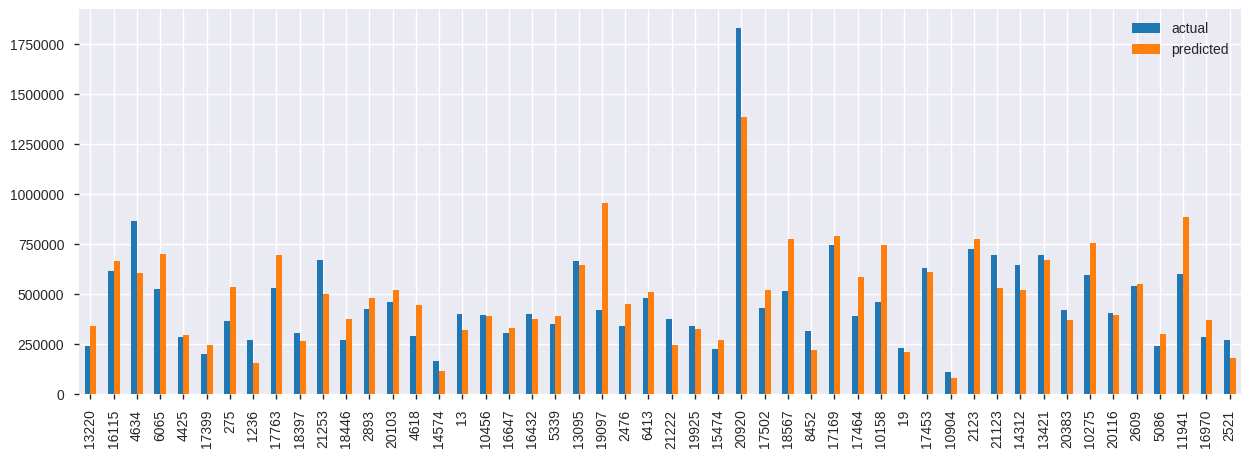

In [299]:
# comparison_frame = pd.DataFrame({"Actual":np.array(y_test),"Predicted":y_predict})
comparison_frame[:50].plot(figsize=(15,5),kind='bar')
plt.show()

## Quantile Regression

In [0]:
# importing python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.5)
  # Then print out the summary of our model
  #
print(res.summary())

## Ridge Regression

In [0]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
#print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
#print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

In [304]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7004811775935081
0.6970797746297318


In [305]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid.
# we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# The metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
from sklearn.model_selection import GridSearchCV
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(x,y)
print(search.best_params_)
{'alpha': 0.01}
print(abs(search.best_score_))

{'alpha': 0.01}
41006237061.55019



The bestparams tells us what to set alpha to which in this case is 0.01.

The bestscore tells us what the best possible mean squared error is.

In this case, the value is 41006237061.55019.

We shalll compare this with that of Lasso and Elastic Net to determine the best model.

In [306]:
ridge1 = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge1.score(X_train, y_train))
print(ridge1.score(X_test, y_test))

0.7004811792454659
0.6970782335005372


In [307]:
# Calculating 10% of the actual mean

0.1*(np.mean(y))

54017.894484035176

In [308]:
# Calculating RMSE from Mean Squared Error 

np.sqrt(41006237061.55019)

202499.96805320785

Comparing the ten percent of the actual mean (54017.894484035176) with the RMSE (202499.96805320785), the RMSE is quite high indicating that Ridge is not a good model to predict rank.

## Lasso Regression

Lasso stands for Least Absolute Shrinkage Selector Operator.

Lasso is a regularization technique. Use lasso to:

* Reduce the number of predictors in a regression model.

* Identify important predictors.

* Select among redundant predictors.

* Produce shrinkage estimates with potentially lower predictive errors than ordinary least squares.

In [309]:
# Using grid search to find the best parameters to use in Lasso regression model

# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting model and print the best parameter, R-squared score, MSE, and coefficients

gridlasso.fit(X_train, y_train) 

print("lasso best parameters:", gridlasso.best_params_) 

print("lasso score:", gridlasso.score(X_test, y_test))

print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7047415371201449
lasso MSE: 40152791730.95019
lasso best estimator coef: [ -4715.91685662 -33456.99040272  29128.38921833 209622.08905371
   4809.4159798    4506.38785207  45811.15584341  42619.98032656
  16356.28420212 112620.72152019 -36475.57988488 -31745.56240508
 -76025.69758139   6636.97262861 -31519.4350141   84306.9242907
 -28880.43760352  11604.99360959 -10785.48375634]


In [310]:
# Computing the Lasso RMSE from the MSE
np.sqrt(40152791730.95019)

200381.61525187432

In [311]:
# Computing 10% of the actual mean for comparison with the Lasso RMSE

0.1*(np.mean(y_test))

54530.810512678145


Comparing the RMSE (200381.61525187432), and actual mean (54530.810512678145), the RMSE is higher.

Comparing the Lasso RMSE (200381.61525187432), and the Ridge RMSE (202499.96805320785), the Lasso model is better compared with the Ridge model.

In [312]:
print(r2_score(y_test, y_pred))

0.630688806372057


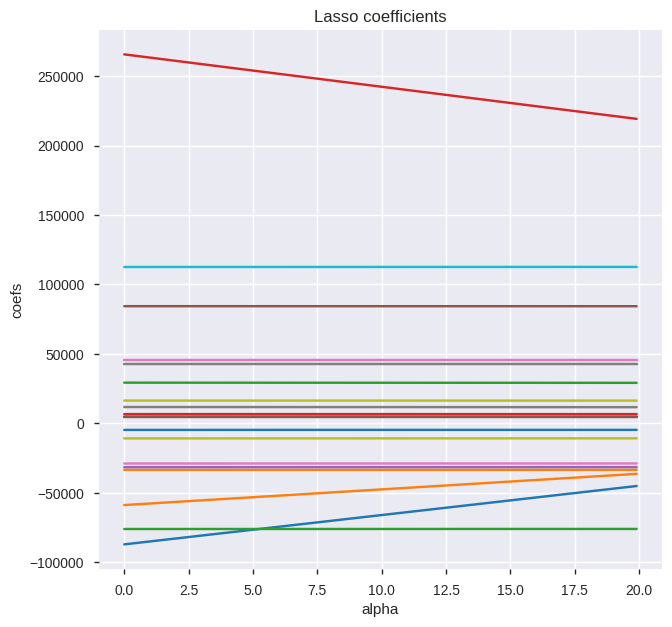

In [313]:
# Visualizing the effect of Lasso Regularization on co-efficients.
# Fist we create a list where we shall input the coefficients after building the model.

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# From the chart below, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable


## ElasticNet Regression

* Elastic Net is a mix of both L1 and L2 regularization.

* In this case, we apply a penalty to the sum of the absolute values and to the sum of the squared values.

* Elastic net is a hybrid of ridge regression and lasso regularization.

* Like lasso, elastic net can generate reduced models by generating zero-valued coefficients.

* Empirical studies have suggested that the elastic net technique can outperform lasso on data with highly correlated predictors.

In [314]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalized data. 
# This argument is set inside the ElasticNet function. 
# We will use grid search to find the best parameters.
# Just like in Ridge and Lasso

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator = elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


41047954641.08102

The Elastic Net Output indicates the best parameters to use in the model;

alpha = 1e-05, and the l1_ratio = 0.8.

The best MSE score is 41047954641.08102.

Comparing this with the Ridge (41006237061.55019), and Lasso (40152791730.95019), it is actually above the others.

This means that Elastic is still not a good model in predicting rank, despite the fact that it combines the power of the L1 (Lasso) and L2 (Ridge) regularizations.

In [315]:
# Computing the RMSE from ELastic Net MSE

np.sqrt(41047954641.08102)

202602.9482536743

In [316]:
# computing 10% of the mean actual mean
0.1*(np.mean(y))

54017.894484035176

In [317]:
print(r2_score(y_test, y_pred))

0.630688806372057



Comparing the RMSE (202602.9482536743), and 10% of the actual mean (54017.894484035176), the RMSE is higher.

This shows that Elastic Net is not a good model in predicting the rank.

Comparing the Lasso RMSE (200381.61525187432), and the Ridge RMSE (202499.96805320785), the Lasso Regression performs best.

Though none is good at predicting the rank.

## Conclusion


None of the three regularized regression models is a good fit to predict the rank; they all have RMSE scores greater than the mean of the actual.

Comparison: Elastic Net RMSE(202602.9482536743), Lasso RMSE (200381.61525187432), Ridge RMSE (202499.96805320785) against the actual mean (10.16)

Since this is also more of a classification problem, using regressions is not the best approach though this project was restrictive.